In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import norm
import math
import statistics
from scipy.optimize import fsolve
##plt.rcParams['text.usetex'] = False
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.family'] = 'serif'

# DEFINE GAUSSIAN FUNCTIONS

In [3]:
#### DEFINE GAUSSIAN FUNCTIONS

## Gaussian function
def Gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))


## Get counts and bincenters from histogram (bincenters later to be used as x values for Gaussian)
def Gaussian_counts_bincenters(x, bins):
    counts, bin_edges = np.histogram(x, bins=bins, density = True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 
    return [counts, bin_centers]

    
## Get Gaussian params - mu and sigma
def Gaussian_params(x, bins):
    counts, bin_centers = Gaussian_counts_bincenters(x, bins)
    p0 = [np.mean(x), np.std(x)]  # Initial guess for the parameters
    params, cov = curve_fit(Gaussian, bin_centers, counts, p0=p0)
    return params 

# FIND M DARK MATTER HALO VALUE FROM M STELLAR

In [4]:
#####################
##FIND M DARK MATTER HALO VALUE FROM M STELLAR

#ELVES. IV. The Satellite Stellar-to-halo Mass Relation Beyond the Milky Way
# Values and equation from Shany's paper - section 4.2, eq 1

## Equation from Shany's paper
def logMstellar_eq(logMhalo):
    M1 = 11.889
    alpha = 2.1
    beta = 0.464
    epsilon = -1.432
    loggamma = -0.812
    gamma = 10**loggamma
    delta = 0.319
    x = np.log10(10**logMhalo/10**M1)
    logMstellar = epsilon + M1 - np.log10(10**(-alpha*x) + 10**(-beta*x)) + gamma*np.exp(-0.5*(x/delta)**2)
    return logMstellar

## Solve for Mhalo value for given Mstellar value (solve y(x) eq for x value)
def logMhalo_eq (logMstellar):
    func = lambda x: logMstellar_eq(x) - logMstellar  ## def f(x) = 0
    logMhalo_guess = 12
    logMhalo = fsolve(func, logMhalo_guess) ##returns roots of func
    return(logMhalo)


### STNDARD DEVIATION
def std_eq (logMhalo):
    sigma0 = 0.02
    nu = -0.47
    M1 = 11.889
    logsigma = sigma0 + nu * (logMhalo - M1)
    return (logsigma)

In [5]:
Mstellar = 1.72*10**8
logMstellar = np.log10(Mstellar)
Mhalo = logMhalo_eq (logMstellar)
print(Mhalo)

[10.83470542]


[11.20296399]


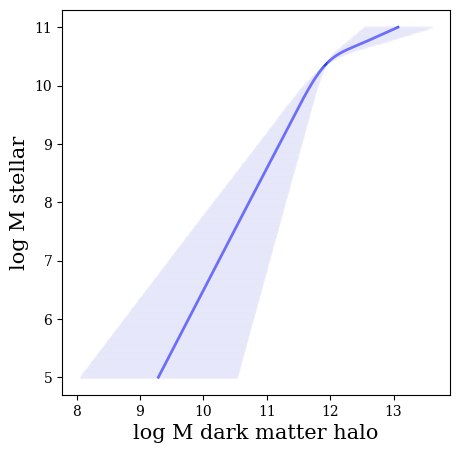

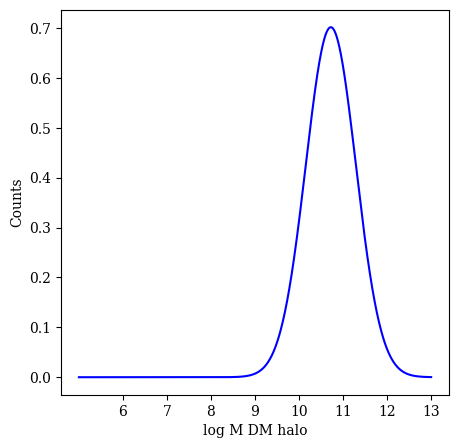

In [6]:
################################################
## DARK MATTER HALO MASS
################################################

logMstellar = 9
logMhalo = logMhalo_eq(logMstellar)
print(logMhalo)


########### DISTRIBUTION #########################
Mstellar = np.logspace(5, 11, 500, base=10)
logMstellar = np.log10(Mstellar)
mean_Mhalos = [] ## M halos for these stellar values
logsigmas = []  ## standard deviations for these M halo values

for i in range (len(logMstellar)):
    logMhalo = logMhalo_eq(logMstellar[i])
    mean_Mhalos.extend (logMhalo) ## gives value of mean halos (not log)
    logsigmas.extend(abs(std_eq(logMhalo)))
    
plt.figure(figsize=(5,5))
plt.plot(mean_Mhalos, logMstellar)
plt.errorbar(mean_Mhalos, logMstellar, xerr = logsigmas, color = 'blue', linewidth = 2, ecolor='lavender', alpha = 0.5)
plt.xlabel('log M dark matter halo', size = 15)
plt.ylabel('log M stellar', size = 15)
plt.xticks(np.linspace(8, 13, 6))
plt.show()



##########PLOT GAUSSIAN FOR GIVEN M STELLAR #######################

logMstellar = 8
plt.figure(figsize=(5,5))
mu = logMhalo_eq(logMstellar)  ##log
sigma = std_eq(mu)  ##log

Mhalos = np.linspace(5, 13, 1000) # Generate x values
gaus = Gaussian(Mhalos, mu, sigma)  # Generate y values

# Plot the Gaussian function
plt.plot(Mhalos, gaus, 'b')
plt.xlabel('log M DM halo')
plt.ylabel('Counts')
plt.xticks(np.linspace(6, 13, 8))
plt.show()



# FIND Re VALUE FROM M STELLAR

In [7]:
#####################
##FIND Re VALUE FROM M STELLAR

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# Eq 5 section 3.5

def logRe_eq (logMstellar):
    a = 1.077
    b = 0.246
    logRe = a + b*logMstellar
    return logRe  #in pc

sigmaRe = 0.181


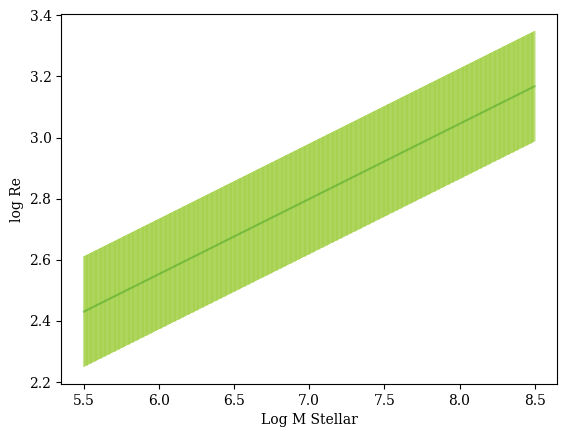

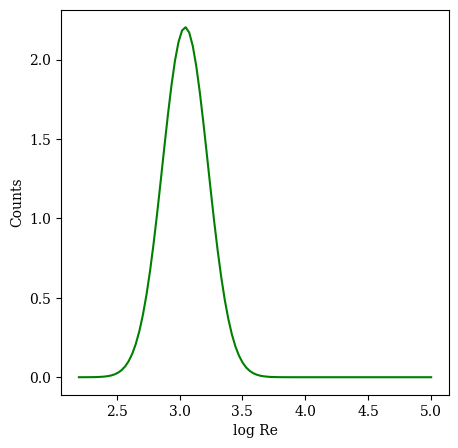

In [8]:
################################################
## Re
################################################

# Structures of Dwarf Satellites of Milky Way-like Galaxies: Morphology, Scaling Relations, and Intrinsic Shapes
# dwarves in mass range 5.5 < M < 8.5


## Plot of Re for range of Stellar values 
logMstellar = np.linspace(5.5, 8.5, 1000)
Re = logRe_eq(logMstellar)

plt.errorbar(logMstellar, Re, yerr = sigmaRe, color = 'green', ecolor = 'yellowgreen', alpha = 0.3)
plt.xlabel('Log M Stellar')
plt.ylabel('log Re')
plt.show


########## Plot Gaussian ##########
logMstellar = 8 
mu = logRe_eq(logMstellar)  ## mean value of Re (from paper) for a given stellar mass
logRe = np.linspace(2.2, 5, 100) # Generate x values ie Re values
gaus = Gaussian(logRe, mu, sigmaRe)  # Gaussian for list of Re values

# Plot the Gaussian function
plt.figure(figsize=(5,5))
plt.plot(logRe, gaus, 'g')
plt.xlabel('log Re')
plt.ylabel('Counts')
#plt.xticks(np.linspace(6, 13, 8))
plt.show()

# GC MASS

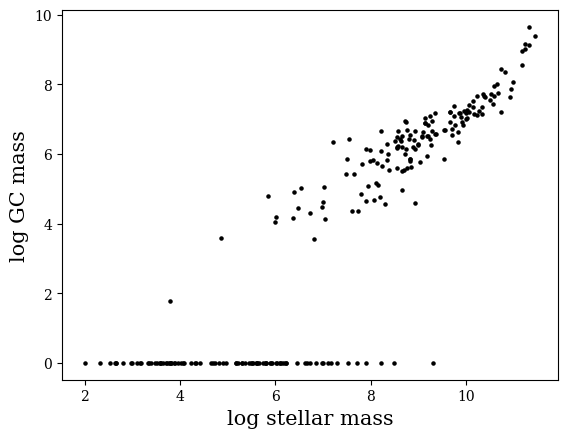

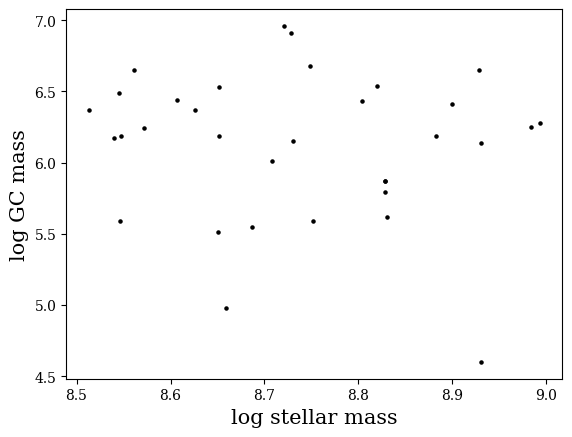

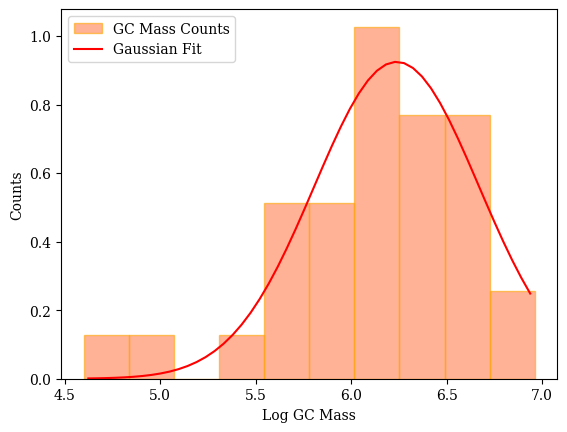

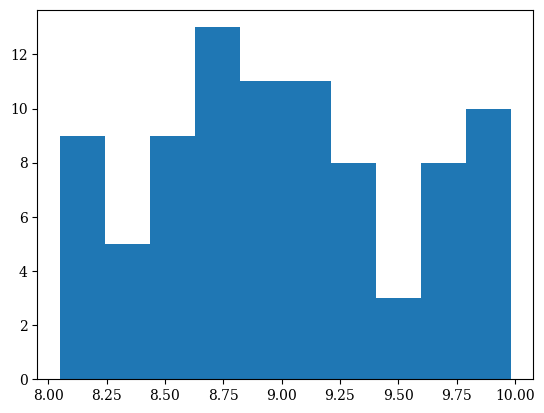

In [9]:
################################################
## GC MASS

## data that Shany sent on slack  
## from Clearing the Hurdle: The Mass of Globular Cluster Systems as a Function of Host Galaxy Mass
## Gwendolyn M. Eadie et al 2022 ApJ 926 162

dataGC = np.genfromtxt('best_sample.txt', skip_header=1, delimiter=',')
M_GC = dataGC[:, 2] # log GC Mass (in solar masses)
M_S = dataGC[:, 4] #log Stellar Mass


###plot a scatter plot of said data
plt.scatter(M_S, M_GC, s=5, color = 'black')  ## Mgc or Mgc/Ms????
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


################# VERTICAL STRIPE #################

### choose a range of stellar masses to isolate a vertical 'stripe from data'

def Stripe_bounds(MStellar):
    if 8.5 <= MStellar <= 9:
        lbound = 8.5
        ubound = 9
        histbins = 10
    elif 9 < MStellar <= 10.5:
        lbound = 9
        ubound = 10.5
        histbins = 12 #??
    elif 7 <= MStellar < 8.5:
        lbound = 7
        ubound = 8.5
        histbins = 12
    return(lbound, ubound, histbins)

lbound, ubound, histbins = Stripe_bounds(8.7)

## get stellar and GC masses within stripe
def GC_stripe_func (lbound, ubound):
    dataGC = np.genfromtxt('best_sample.txt', skip_header=1, delimiter=',')
    M_GC = dataGC[:, 2] # log GC Mass (in solar masses)
    M_S = dataGC[:, 4] #log Stellar Mass
    M_GCstripe = [] 
    M_Sstripe = []
    n = len(M_GC)
    for i in range (n):
        if M_S[i] >= lbound and M_S[i] <= ubound and M_GC[i]!=0:
            M_GCstripe.append(M_GC[i])
            M_Sstripe.append(M_S[i])
    return [M_GCstripe, M_Sstripe]

M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)
        
plt.scatter(M_Sstripe, M_GCstripe, s=5, color='black')
plt.xlabel('log stellar mass', fontsize=15)
plt.ylabel('log GC mass', fontsize=15)
plt.show()


################### DISTRIBUTION #################


plt.hist(M_GCstripe, histbins, alpha=0.6, label='GC Mass Counts', color='coral', edgecolor='orange', density = True)

params = Gaussian_params(M_GCstripe, bins=10) ## best fit params for if GC masses were split into 10 bins 
curve_bin_centers = Gaussian_counts_bincenters(M_GCstripe, 50)[1] ## get bin centers for if historgram of GC masses was split into 50 bins - will be used as x values for gaussian curve


plt.plot(curve_bin_centers, Gaussian(curve_bin_centers, *params), 'r-', label='Gaussian Fit')
plt.xlabel('Log GC Mass')
plt.ylabel('Counts')
plt.legend()
plt.show()





############ Stellar Mass hist #####
#lbound, ubound, histbins = Stripe_bounds(Mstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (8, 10)
plt.figure()
plt.hist(M_Sstripe, bins = 10)
plt.show()

# SAMPLING MASSES FROM DISTRIBUTION

NameError: name 'muGC' is not defined

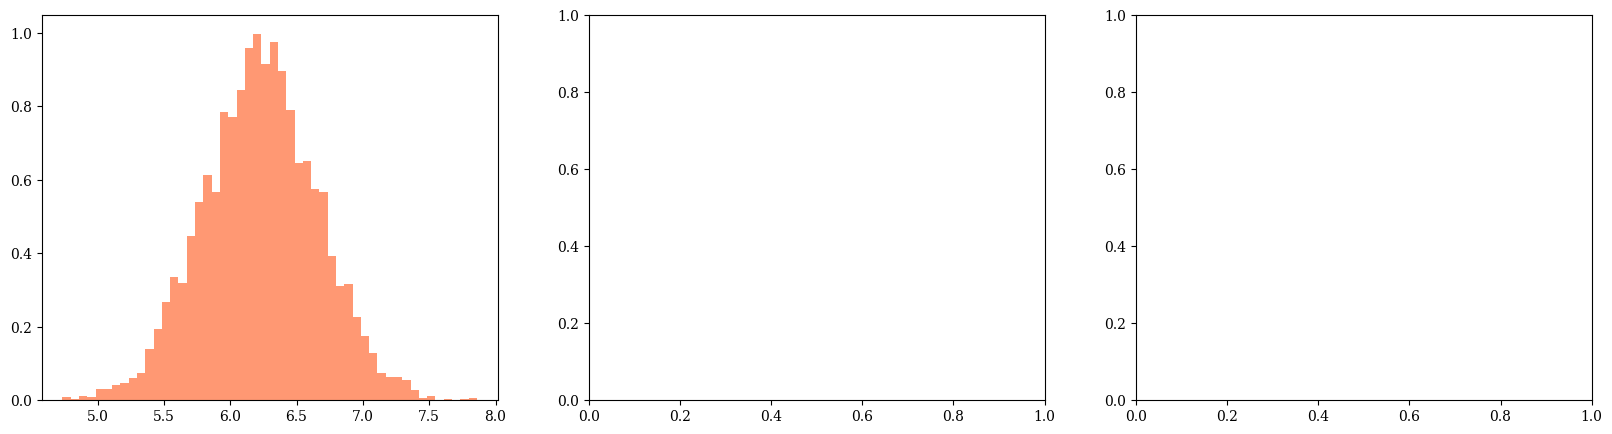

In [11]:
#####################   SAMPLING MASSES FROM DISTRIBUTION ############################    
##sampling GC Mass for a given Stellar Mass
logMstellar = 8.5
n = 5000


lbound, ubound, histbins = Stripe_bounds(logMstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)

def GC_random_sample (M_GCstripe, n):
    mu, sigma = Gaussian_params(M_GCstripe, bins=10)
    sample_masses = np.random.normal(mu, sigma, n)
    return sample_masses



############## SAMPLE MASSES FROM DISTRIBUTION ##############################
##### Sampling DM Halo mass

def DM_random_sample (logMstellar, n):
    mu = logMhalo_eq(logMstellar)  ##log
    sigma = std_eq(mu)  ##log
    sample_masses = np.random.normal(mu, sigma, n)
    return (sample_masses)

muDM = logMhalo_eq(logMstellar)  ##log
sigmaDM = std_eq(muDM) 



#####################   SAMPLING MASSES FROM DISTRIBUTION ############################    
##sampling GC Mass for a given Stellar Mass
muRe = logRe_eq(logMstellar) 
def Re_random_sample (logMstellar, n):
    mu = logRe_eq(logMstellar)
    sigma = 0.181  
    sample_Re = np.random.normal(mu, sigma, n)
    return sample_Re


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5)) ##sharey='row'


count, bins, ignoored = ax1.hist(GC_random_sample (M_GCstripe, n), 50, density=True, color = 'coral', alpha=0.8)
ax1.plot(bins, Gaussian(bins, muGC, sigmaGC), linewidth=2, color='r')
ax1.set_xlabel('$log(M_{GC})$', fontsize= 15)
ax1.set_ylabel('Counts', fontsize = 20)



count, bins, ignoored = ax2.hist(DM_random_sample (logMstellar, n), 50, density=True, color = 'mediumslateblue', alpha=0.8)
ax2.plot(bins, Gaussian(bins, muDM, sigmaDM), linewidth=2, color='b')
#ax2.xticks(np.linspace(6, 13, 8))
ax2.set_xlabel('$log(M_{{DMhalo}})$', fontsize = 20)




count, bins, ignoored = ax3.hist(Re_random_sample (logMstellar, n), 50, density=True, color = 'yellowgreen', alpha=0.8)
ax3.plot(bins, Gaussian(bins, muRe, sigmaRe), linewidth=2, color='g')
ax3.set_xlabel('$log(Re)$', fontsize = 20)






plt.show()

# GRID PLOTS

<function matplotlib.pyplot.show(close=None, block=None)>

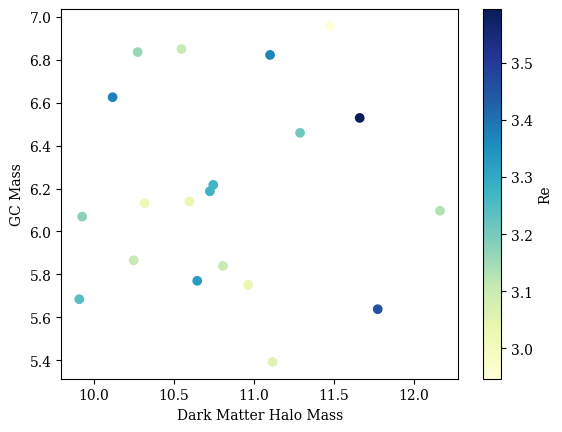

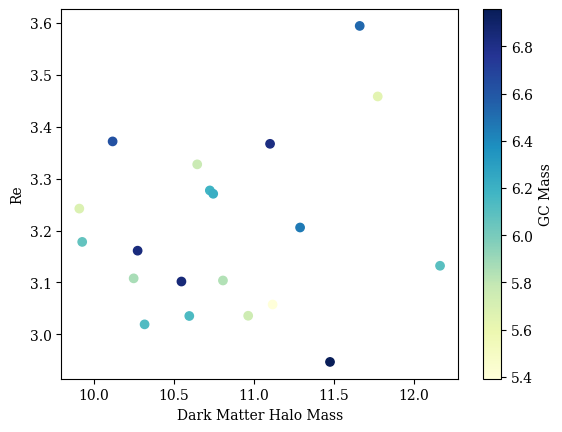

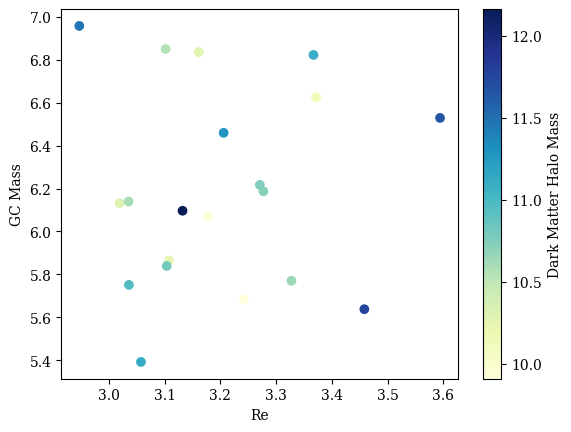

In [12]:
######################################################################
### GRID PLOTS 
######################################################################

logMstellar = 8.5
n = 20

DM_sample = DM_random_sample(logMstellar, n)
Re_sample = Re_random_sample(logMstellar, n)

lbound, ubound, histbins = Stripe_bounds(logMstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)
GC_sample = GC_random_sample(M_GCstripe, n)

####M DM HALO VS M GC #########
plt.figure()
plt.scatter(DM_sample, GC_sample, c = Re_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('Re')
plt.xlabel('Dark Matter Halo Mass')
plt.ylabel('GC Mass')
plt.show

####### M DM HALO VS Re #########
plt.figure()
plt.scatter(DM_sample, Re_sample, c = GC_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('GC Mass')
plt.xlabel('Dark Matter Halo Mass')
plt.ylabel('Re')
plt.show


####### Re VS M GC  #########
plt.figure()
plt.scatter(Re_sample, GC_sample, c = DM_sample, cmap = 'YlGnBu')
colorbar = plt.colorbar()
colorbar.set_label('Dark Matter Halo Mass')
plt.xlabel('Re')
plt.ylabel('GC Mass')
plt.show

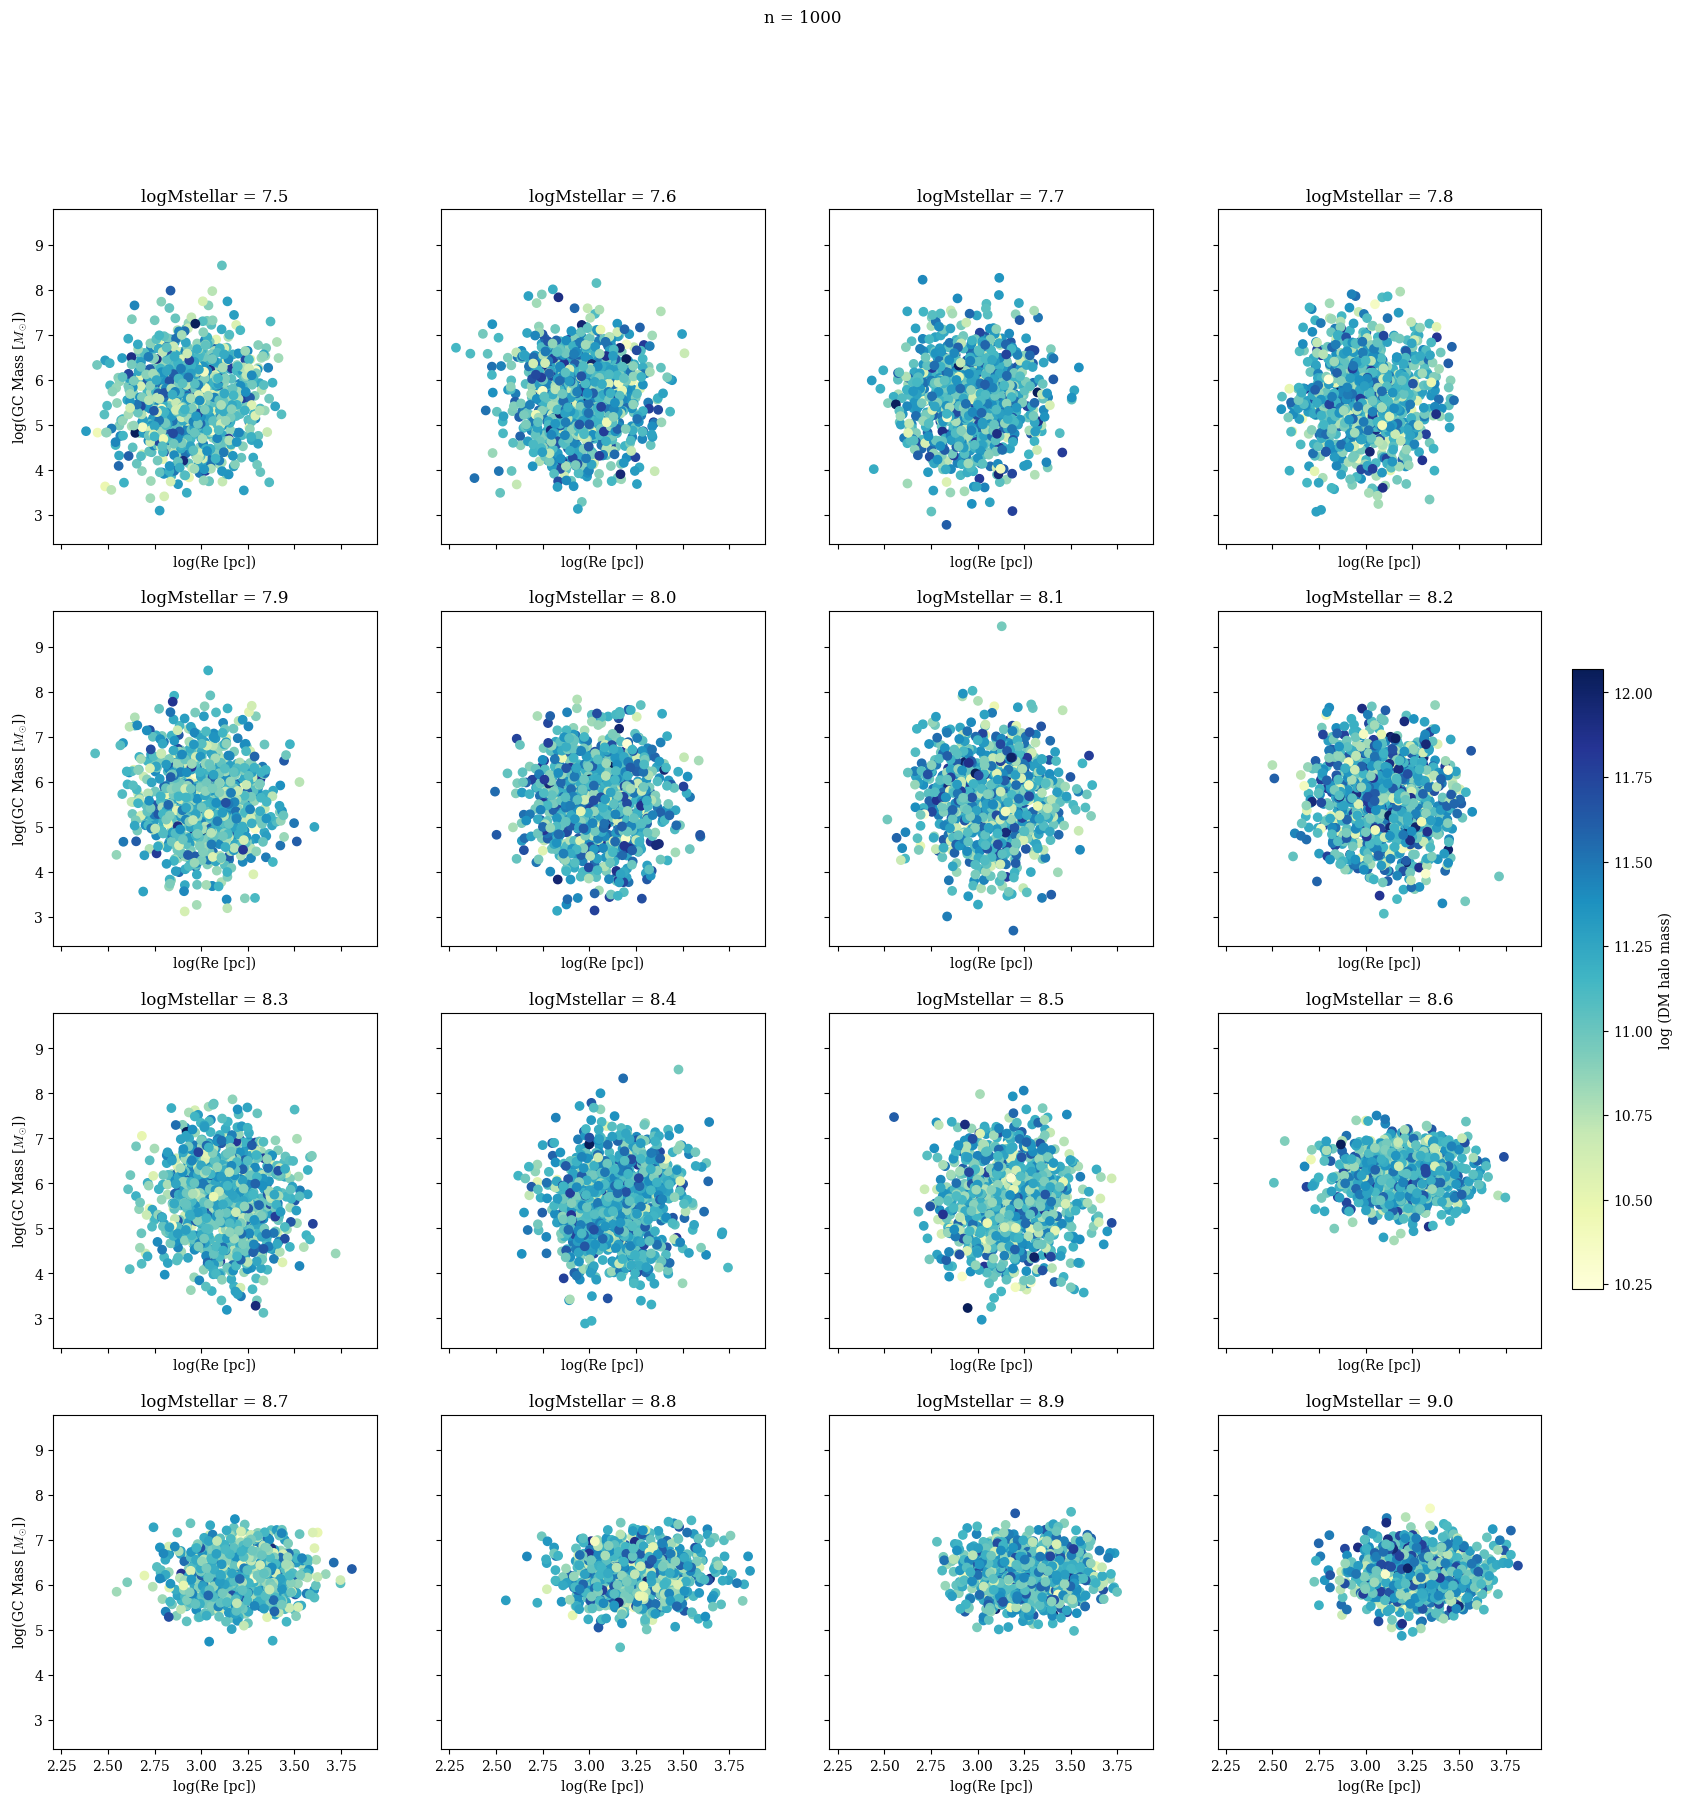

In [13]:
######################################################################
### GRID PLOTS 
######################################################################

# logMstellars = [7.5, 8, 8.5, 9, 9.5]
logMstellars = np.arange(7.5, 9.1, 0.1)
n = 1000
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey = True, sharex = True)


all_DM_samples = []
all_Re_samples = []
all_GC_samples = []
for logMstellar in logMstellars:
    all_DM_samples.append(DM_random_sample(logMstellar, n))
    all_Re_samples.append(Re_random_sample(logMstellar, n))
    
    lbound, ubound, histbins = Stripe_bounds(logMstellar)
    M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)
    all_GC_samples.append(GC_random_sample(M_GCstripe, n))

vmin = np.min(all_DM_samples)
vmax = np.max(all_DM_samples)

for i in range (len(axes)):
    axes[i][0].set_ylabel('log(GC Mass [$M_{\odot}$])')
    for j in range (len(axes[0])):
        index = i * 4 + j
        ax = axes[i][j]
        subplot = ax.scatter(all_Re_samples[index], all_GC_samples[index], c=all_DM_samples[index], cmap = 'YlGnBu')
        ax.set_xlabel('log(Re [pc])')
        ax.set_title(f'logMstellar = {logMstellars[index]:.1f}')  # Set individual title




cbar = fig.colorbar(subplot, ax=axes, orientation='vertical', fraction=0.02, pad=0.02)
cbar.set_label('log (DM halo mass)')


plt.suptitle ('n = 1000')
plt.show()

In [14]:
print(np.max(all_DM_samples[15]))

12.068511716445496


<function matplotlib.pyplot.show(close=None, block=None)>

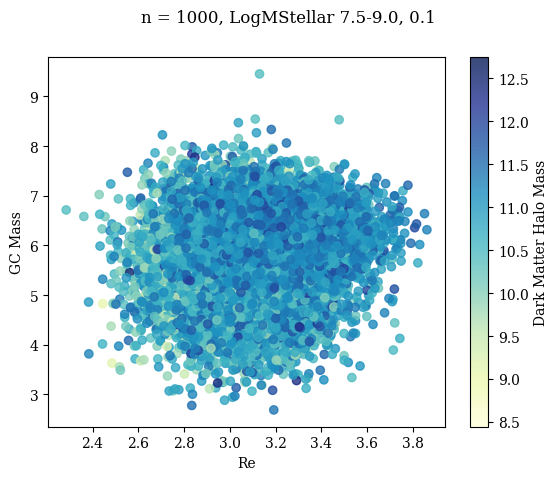

In [15]:
all_Re_samples = np.array(all_Re_samples).flatten()
all_GC_samples = np.array(all_GC_samples).flatten()
all_DM_samples = np.array(all_DM_samples).flatten()

plt.figure()
plt.scatter(all_Re_samples, all_GC_samples, c =all_DM_samples, cmap = 'YlGnBu', alpha = 0.8)
colorbar = plt.colorbar()
colorbar.set_label('Dark Matter Halo Mass')
plt.xlabel('Re')
plt.ylabel('GC Mass')
plt.suptitle ('n = 1000, LogMStellar 7.5-9.0, 0.1')
plt.show


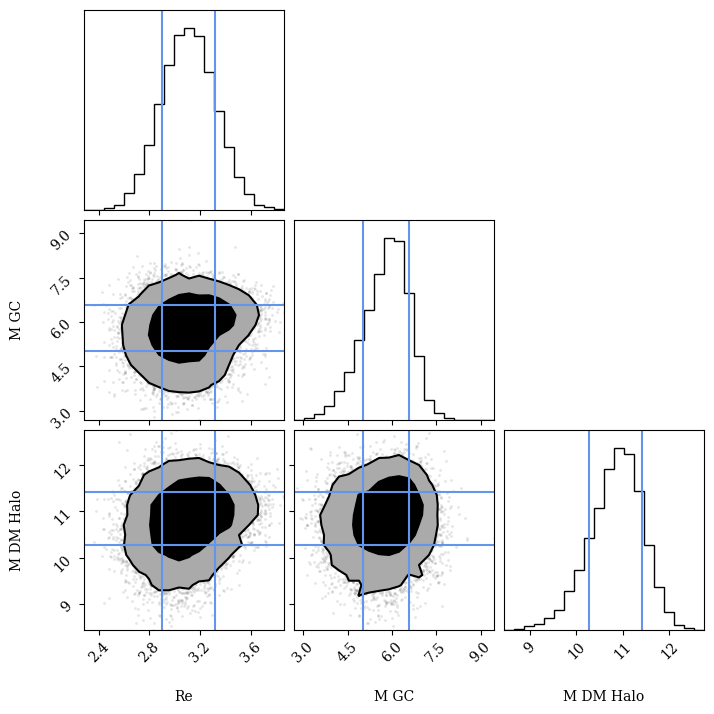

In [16]:
import numpy as np
import corner

# Example data: 1000 samples of 3 variables

data = np.vstack([all_Re_samples, all_GC_samples, all_DM_samples]).T  # Replace with your actual data

# Create the corner plot
contour_colors = ['blue', 'red']
figure = corner.corner(
    data,
    labels=["Re", "M GC", "M DM Halo"],
    levels=[0.6827, 0.9545],  # 1 sigma and 2 sigma contours
    fill_contours=True,  # Fill the contours with color
    plot_contours=True,  # Plot contour lines
)

stds = np.std(data, axis=0)
means = np.mean(data, axis=0)

corner.overplot_lines(figure, means+stds, color="cornflowerblue")
corner.overplot_lines(figure, means-stds, color="cornflowerblue")

# Show the plot
figure.show()


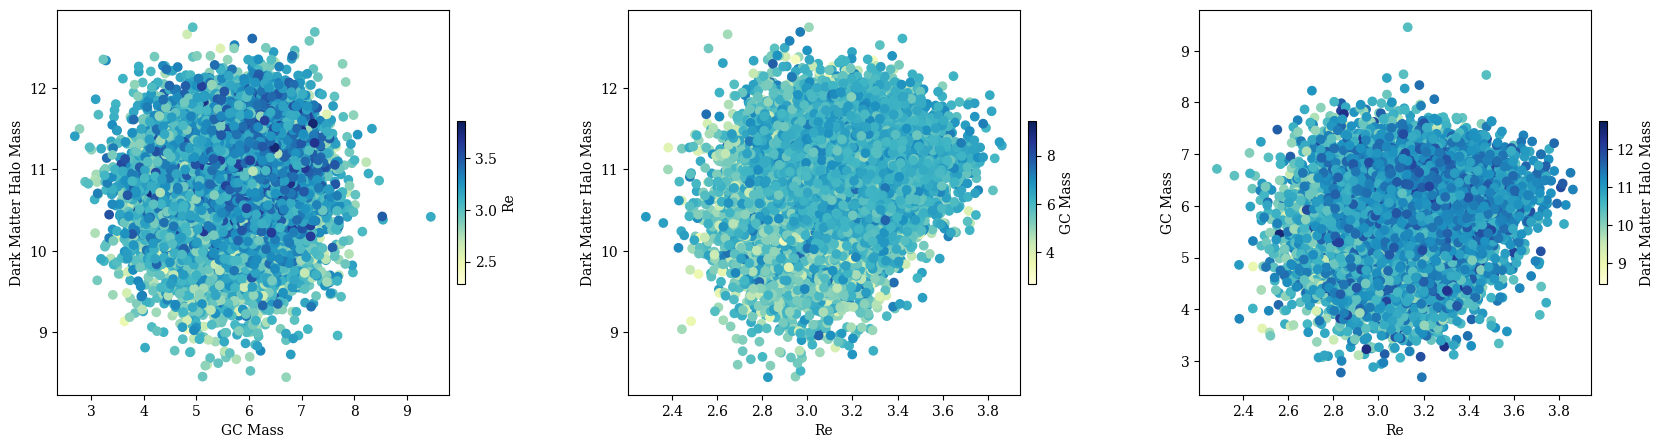

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.subplots_adjust(wspace=0.4)

####M DM HALO VS M GC #########

sc0 = axes[0].scatter(all_GC_samples,all_DM_samples,  c = all_Re_samples, cmap = 'YlGnBu')
cbar0 = fig.colorbar(sc0,ax=axes[0], orientation='vertical', fraction=0.02, pad=0.02)
cbar0.set_label('Re')
axes[0].set_ylabel('Dark Matter Halo Mass')
axes[0].set_xlabel('GC Mass')


####### M DM HALO VS Re #########
sc1 = axes[1].scatter(all_Re_samples, all_DM_samples, c = all_GC_samples, cmap = 'YlGnBu')
cbar1 = fig.colorbar(sc1, ax=axes[1], orientation='vertical', fraction=0.02, pad=0.02)
cbar1.set_label('GC Mass')
axes[1].set_ylabel('Dark Matter Halo Mass')
axes[1].set_xlabel('Re')

####### Re VS M GC  #########

sc2 = axes[2].scatter(all_Re_samples, all_GC_samples, c = all_DM_samples, cmap = 'YlGnBu')
cbar2 = fig.colorbar(sc2, ax=axes[2], orientation='vertical', fraction=0.02, pad=0.02)
cbar2.set_label('Dark Matter Halo Mass')
axes[2].set_xlabel('Re')
axes[2].set_ylabel('GC Mass')
plt.show()

In [18]:

logMstellar = 9
n = 100

DM_sample = DM_random_sample(logMstellar, n)
Re_sample = Re_random_sample(logMstellar, n)

lbound, ubound, histbins = Stripe_bounds(logMstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)
GC_sample = GC_random_sample(M_GCstripe, n)




print ('Re: ', Re_sample)
print ('GC: ', GC_sample)
print ('Halo: ', DM_sample)

Re:  [3.24792347 3.35817079 3.15184324 3.5601909  3.1308202  3.27781215
 3.17334111 3.52127831 3.53389235 3.12720974 3.23892047 3.00912965
 3.40528339 3.06868816 2.95737737 3.12029405 3.30156204 3.74227152
 3.2491629  3.25362238 3.40928933 3.06958327 3.18006255 3.56038751
 3.03954846 3.46117665 3.3923565  3.46174229 3.13438269 3.15490931
 3.5293929  3.20844437 3.47668076 3.0848722  3.20452581 3.13642512
 3.44587258 2.93368927 3.04264501 3.27955785 3.32567121 3.19514632
 3.71185273 3.65019625 3.21137457 3.38801221 3.23304952 3.31323153
 3.15022897 3.23310492 3.20994751 3.4852527  3.18248842 3.50527205
 3.55093847 3.31319092 3.17216987 3.44777519 3.42315994 3.13850969
 3.37208626 3.51978953 3.23770121 3.35163442 3.21276034 3.23221849
 3.42484346 3.27337933 3.21256717 3.05591611 3.00776137 3.34702772
 3.25629685 3.23708464 3.27086062 3.38004059 3.20652151 3.05727903
 3.16954639 2.79514919 3.16137074 3.33078718 3.29838672 3.4346646
 3.37598212 3.26700913 3.04879913 3.60842124 3.60605322 3.

In [29]:
for i in range(len(GC_sample)):
    GC_sample[i] = 10**GC_sample[i]/10**5  #10^5 solar masses
    Re_sample[i] = 10**Re_sample[i]/1000  #kpc
    DM_sample[i] = 10**DM_sample[i]  #solar masses
print ('Re: ', Re_sample)
print ('GC: ', GC_sample)
print ('Halo: ', DM_sample) 



Re:  [2.64240876 1.46217717 2.46603934 1.0543869  1.59955803 2.64850014
 2.35504928 1.69044093 1.19674053 1.61064564 1.03992017 1.48593564
 0.83368118 2.74157417 2.65460556 0.96161228 0.9332543  2.35504928
 3.62242998 4.39541615 3.90840896 1.96336028 2.01836636 2.47742206
 0.7481695  2.30674719 1.74582215 2.36047823 2.17270118 2.831392
 1.68655303 1.16412603 3.31894458 0.98855309 1.96336028 3.08318795
 1.45881426 1.76197605 3.08318795 1.24451461 3.06902199 2.57632116
 2.63633139 2.96483139 1.69044093 0.7568329  3.18419752 1.5703628
 2.72270131 1.78237877 1.840772   2.06062991 1.59955803 1.06659612
 2.85101827 0.58210322 2.43220401 3.25836701 1.74582215 2.61216135
 2.76057786 0.76032628 2.59417936 2.39331576 4.07380278 1.19124201
 2.21819642 1.01624869 1.59220873 4.35511874 2.76694165 1.19124201
 2.1677041  2.81838293 2.96483139 1.72981636 1.3121999  3.19889511
 3.52370871 0.78704579 2.80543364 6.03948629 2.25423921 1.79060585
 2.78612117 2.11348904 2.39331576 1.92309173 2.70395836 1.82

In [21]:
logMstellar = 8
n = 20

DM_sample = DM_random_sample(logMstellar, n)
Re_sample = Re_random_sample(logMstellar, n)

lbound, ubound, histbins = Stripe_bounds(logMstellar)
M_GCstripe, M_Sstripe = GC_stripe_func (lbound, ubound)
GC_sample = GC_random_sample(M_GCstripe, n)


for i in range(len(GC_sample)):
    GC_sample[i] = 10**GC_sample[i]/10**5  #10^5 solar masses
    Re_sample[i] = 10**Re_sample[i]/1000  #kpc
    DM_sample[i] = 10**DM_sample[i]  #solar masses
print ('Re: ', Re_sample)
print ('GC: ', GC_sample)
print ('Halo: ', DM_sample) 

Re:  [1.72571247 2.26801028 1.39608619 0.46404044 1.22814868 2.18729835
 1.94124367 0.91779947 1.0631087  1.36489788 1.5836098  1.21040164
 0.37571389 0.84259306 0.82057939 1.3362418  1.17873591 0.63264396
 1.22459659 0.4315953 ]
GC:  [ 5.33436268  4.19079814  7.62084363  9.81679492  5.9399987   0.65247854
  0.99395001  0.17184509  0.30402729  8.70023092  1.97719481  2.16960864
 75.87548067  0.97521744  0.44175622 11.04441439  9.54841964 40.32476759
 51.86308709  1.15407076]
Halo:  [4.34530246e+11 2.23807910e+10 1.78364840e+11 5.39917408e+10
 1.61777737e+10 8.22339188e+10 2.57781308e+10 2.21018279e+10
 1.53516920e+11 7.30528024e+10 9.10795194e+10 2.59593261e+10
 5.01022784e+10 3.13812302e+11 5.54619901e+09 1.15339801e+11
 2.61431524e+10 1.23259648e+11 2.68698962e+11 2.02314546e+09]


In [16]:
Re_sample = [1.53239508, 2.90277581, 0.74401637, 1.18889862, 2.11042019, 0.98444861,
 0.99960505, 1.42970509, 1.5681506,  0.88548025, 3.17477447, 0.82402456,
 0.63540892, 1.05342352, 3.4766352,  1.47598624, 1.61196329, 1.42590726,
 1.70731518, 1.39300399]



GC_sample = [ 7.8762627,  17.79520947, 19.19769758,  5.75918816, 11.16904601, 16.12757648,
  7.68512067,  5.51991984, 42.08897264, 22.00512255,  3.89387878, 12.21430189,
  4.61469182, 25.89079167, 32.22007898, 18.81160987, 27.72601655, 10.28096513,
  6.33986752, 38.22206118]

DM_sample = [9.32726143*10**10, 2.62488939*10**10, 2.56044812*10**11, 6.88327683*10**10,
 1.74653093*10**11, 1.03838141*10**11, 3.62040398*10**11, 7.14850956*10**10,
 1.33619820*10**11, 4.68353599*10**10, 1.93382372*10**10, 1.67265950*10**11,
 4.53786287*10**10, 3.68009259*10**10, 1.23862238*10**11, 7.34761068*10**10,
 3.21975609*10**10, 3.27226465*10**11, 1.50636807*10**11, 7.54885922*10**9]




for i in range(len(GC_sample)):
    GC_sample[i] = round(GC_sample[i], 3)
    Re_sample[i] = round(Re_sample[i], 3)
    DM_sample[i] = round(DM_sample[i], 1)
print ('Re: ', Re_sample)
print ('GC: ', GC_sample)
print ('Halo: ', DM_sample)    

Re:  [1.532, 2.903, 0.744, 1.189, 2.11, 0.984, 1.0, 1.43, 1.568, 0.885, 3.175, 0.824, 0.635, 1.053, 3.477, 1.476, 1.612, 1.426, 1.707, 1.393]
GC:  [7.876, 17.795, 19.198, 5.759, 11.169, 16.128, 7.685, 5.52, 42.089, 22.005, 3.894, 12.214, 4.615, 25.891, 32.22, 18.812, 27.726, 10.281, 6.34, 38.222]
Halo:  [93272614300.0, 26248893900.0, 256044812000.0, 68832768300.0, 174653093000.0, 103838141000.0, 362040398000.0, 71485095600.0, 133619820000.0, 46835359900.0, 19338237200.0, 167265950000.0, 45378628700.0, 36800925900.0, 123862238000.0, 73476106800.0, 32197560900.0, 327226465000.0, 150636807000.0, 7548859220.0]


In [35]:
for i in range(len(GC_sample)):
    GC_sample[i] = 10**GC_sample[i]/10**5  #10^5 solar masses
    Re_sample[i] = 10**Re_sample[i]/1000  #kpc
    DM_sample[i] = 10**DM_sample[i]  #solar masses

print ('Re: ', Re_sample)
print ('GC: ', GC_sample)
print ('Halo: ', DM_sample)

Re:  [1.53239508 2.90277581 0.74401637 1.18889862 2.11042019 0.98444861
 0.99960505 1.42970509 1.5681506  0.88548025 3.17477447 0.82402456
 0.63540892 1.05342352 3.4766352  1.47598624 1.61196329 1.42590726
 1.70731518 1.39300399]
GC:  [ 7.8762627  17.79520947 19.19769758  5.75918816 11.16904601 16.12757648
  7.68512067  5.51991984 42.08897264 22.00512255  3.89387878 12.21430189
  4.61469182 25.89079167 32.22007898 18.81160987 27.72601655 10.28096513
  6.33986752 38.22206118]
Halo:  [9.32726143e+10 2.62488939e+10 2.56044812e+11 6.88327683e+10
 1.74653093e+11 1.03838141e+11 3.62040398e+11 7.14850956e+10
 1.33619820e+11 4.68353599e+10 1.93382372e+10 1.67265950e+11
 4.53786287e+10 3.68009259e+10 1.23862238e+11 7.34761068e+10
 3.21975609e+10 3.27226465e+11 1.50636807e+11 7.54885922e+09]
